In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `~/Documents/programming/BME-574-2024`


In [2]:
Pkg.add(["Random","Images","Colors","MAT","LinearAlgebra","MLDatasets","CairoMakie","DataFrames"])

    Updating registry at `~/.julia/registries/JSMLComponents.toml`
    Updating registry at `~/.julia/registries/JuliaComputingRegistry.toml`
    Updating registry at `~/.julia/registries/JuliaHubRegistry.toml`
   Resolving package versions...
  No Changes to `~/Documents/programming/BME-574-2024/Project.toml`
  No Changes to `~/Documents/programming/BME-574-2024/Manifest.toml`


In [3]:
using Images, Colors, MLDatasets, CairoMakie, DataFrames

In [8]:
iris = Iris()

dataset Iris:
  metadata   =>    Dict{String, Any} with 4 entries
  features   =>    150×4 DataFrame
  targets    =>    150×1 DataFrame
  dataframe  =>    150×5 DataFrame

In [9]:
iris.features

Row,sepallength,sepalwidth,petallength,petalwidth
,Float64,Float64,Float64,Float64
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
6,5.4,3.9,1.7,0.4
7,4.6,3.4,1.4,0.3
8,5.0,3.4,1.5,0.2
9,4.4,2.9,1.4,0.2


In [10]:
x = Array(iris.features)

150×4 Matrix{Float64}:
 5.1  3.5  1.4  0.2
 4.9  3.0  1.4  0.2
 4.7  3.2  1.3  0.2
 4.6  3.1  1.5  0.2
 5.0  3.6  1.4  0.2
 5.4  3.9  1.7  0.4
 4.6  3.4  1.4  0.3
 5.0  3.4  1.5  0.2
 4.4  2.9  1.4  0.2
 4.9  3.1  1.5  0.1
 5.4  3.7  1.5  0.2
 4.8  3.4  1.6  0.2
 4.8  3.0  1.4  0.1
 ⋮              
 6.0  3.0  4.8  1.8
 6.9  3.1  5.4  2.1
 6.7  3.1  5.6  2.4
 6.9  3.1  5.1  2.3
 5.8  2.7  5.1  1.9
 6.8  3.2  5.9  2.3
 6.7  3.3  5.7  2.5
 6.7  3.0  5.2  2.3
 6.3  2.5  5.0  1.9
 6.5  3.0  5.2  2.0
 6.2  3.4  5.4  2.3
 5.9  3.0  5.1  1.8

In [11]:
x1 = [Point3f(xx...) for xx in eachrow(x[1:50,1:3])]
x2 = [Point3f(xx...) for xx in eachrow(x[51:100,1:3])]
x3 = [Point3f(xx...) for xx in eachrow(x[101:150,1:3])]

50-element Vector{Point{3, Float32}}:
 [6.3, 3.3, 6.0]
 [5.8, 2.7, 5.1]
 [7.1, 3.0, 5.9]
 [6.3, 2.9, 5.6]
 [6.5, 3.0, 5.8]
 [7.6, 3.0, 6.6]
 [4.9, 2.5, 4.5]
 [7.3, 2.9, 6.3]
 [6.7, 2.5, 5.8]
 [7.2, 3.6, 6.1]
 [6.5, 3.2, 5.1]
 [6.4, 2.7, 5.3]
 [6.8, 3.0, 5.5]
 ⋮
 [6.0, 3.0, 4.8]
 [6.9, 3.1, 5.4]
 [6.7, 3.1, 5.6]
 [6.9, 3.1, 5.1]
 [5.8, 2.7, 5.1]
 [6.8, 3.2, 5.9]
 [6.7, 3.3, 5.7]
 [6.7, 3.0, 5.2]
 [6.3, 2.5, 5.0]
 [6.5, 3.0, 5.2]
 [6.2, 3.4, 5.4]
 [5.9, 3.0, 5.1]

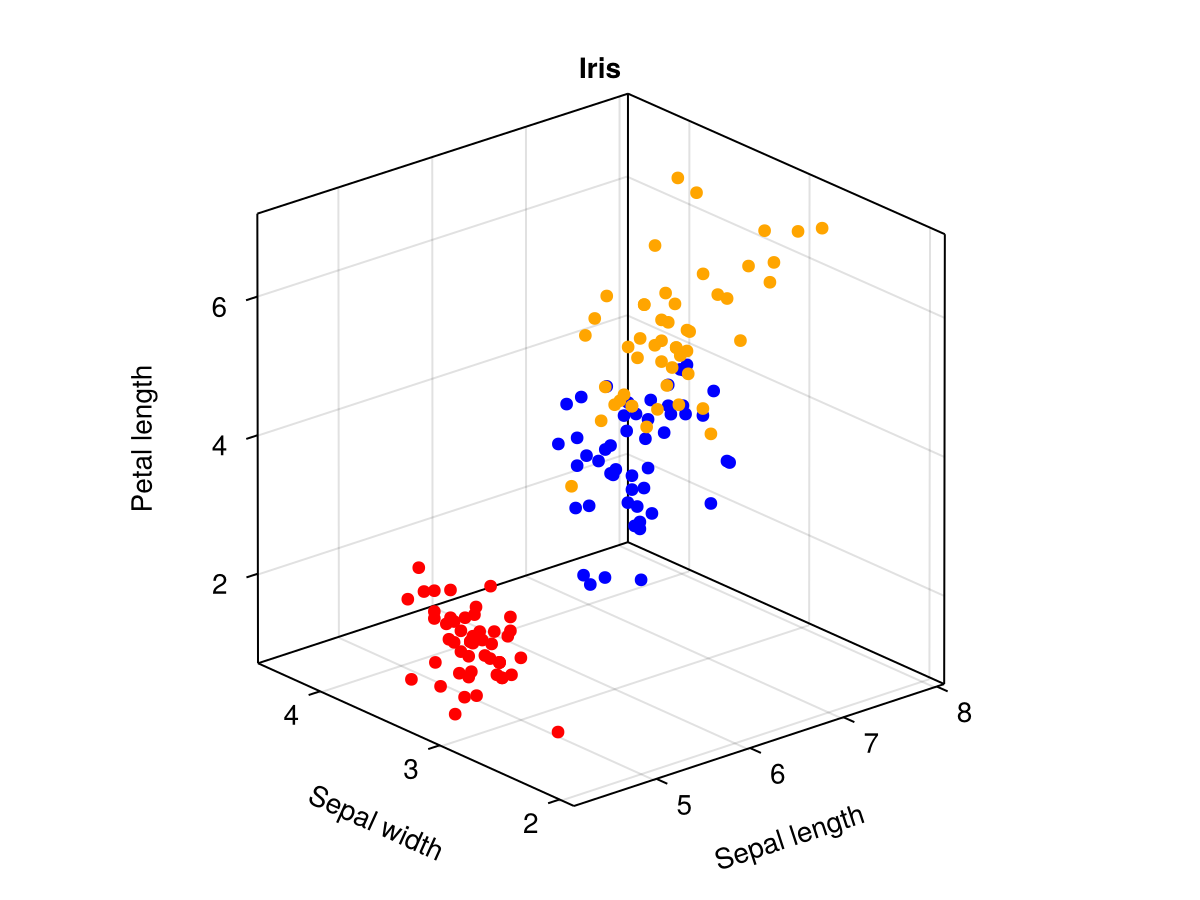

In [14]:
fig = Figure()
ax = Axis3(fig[1,1],
    aspect = (1, 1, 1),
    title = "Iris",
    xlabel = "Sepal length",
    ylabel = "Sepal width",
    zlabel = "Petal length")
scatter!(ax,x1, color=:red)
scatter!(ax,x2, color=:blue)
scatter!(ax,x3, color=:orange)
fig

In [24]:
result = kmeans(x', 3); # run K-means for the 3 clusters
result.assignments
# plot with the point color mapped to the assigned cluster index
#scatter(iris.features[!,"petallength"], iris.features[!,"petalwidth"], marker=result.assignments)

150-element Vector{Int64}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 3
 2
 2
 2
 3
 2
 2
 2
 3
 2
 2
 3

In [27]:
xk1 = [Point3f(xx...) for (idx,xx) in enumerate(eachrow(x[:,1:3])) if result.assignments[idx] == 1]
xk2 = [Point3f(xx...) for (idx,xx) in enumerate(eachrow(x[:,1:3])) if result.assignments[idx] == 2]
xk3 = [Point3f(xx...) for (idx,xx) in enumerate(eachrow(x[:,1:3])) if result.assignments[idx] == 3]

61-element Vector{Point{3, Float32}}:
 [6.4, 3.2, 4.5]
 [5.5, 2.3, 4.0]
 [6.5, 2.8, 4.6]
 [5.7, 2.8, 4.5]
 [6.3, 3.3, 4.7]
 [4.9, 2.4, 3.3]
 [6.6, 2.9, 4.6]
 [5.2, 2.7, 3.9]
 [5.0, 2.0, 3.5]
 [5.9, 3.0, 4.2]
 [6.0, 2.2, 4.0]
 [6.1, 2.9, 4.7]
 [5.6, 2.9, 3.6]
 ⋮
 [5.7, 2.5, 5.0]
 [5.8, 2.8, 5.1]
 [6.0, 2.2, 5.0]
 [5.6, 2.8, 4.9]
 [6.3, 2.7, 4.9]
 [6.2, 2.8, 4.8]
 [6.1, 3.0, 4.9]
 [6.3, 2.8, 5.1]
 [6.0, 3.0, 4.8]
 [5.8, 2.7, 5.1]
 [6.3, 2.5, 5.0]
 [5.9, 3.0, 5.1]

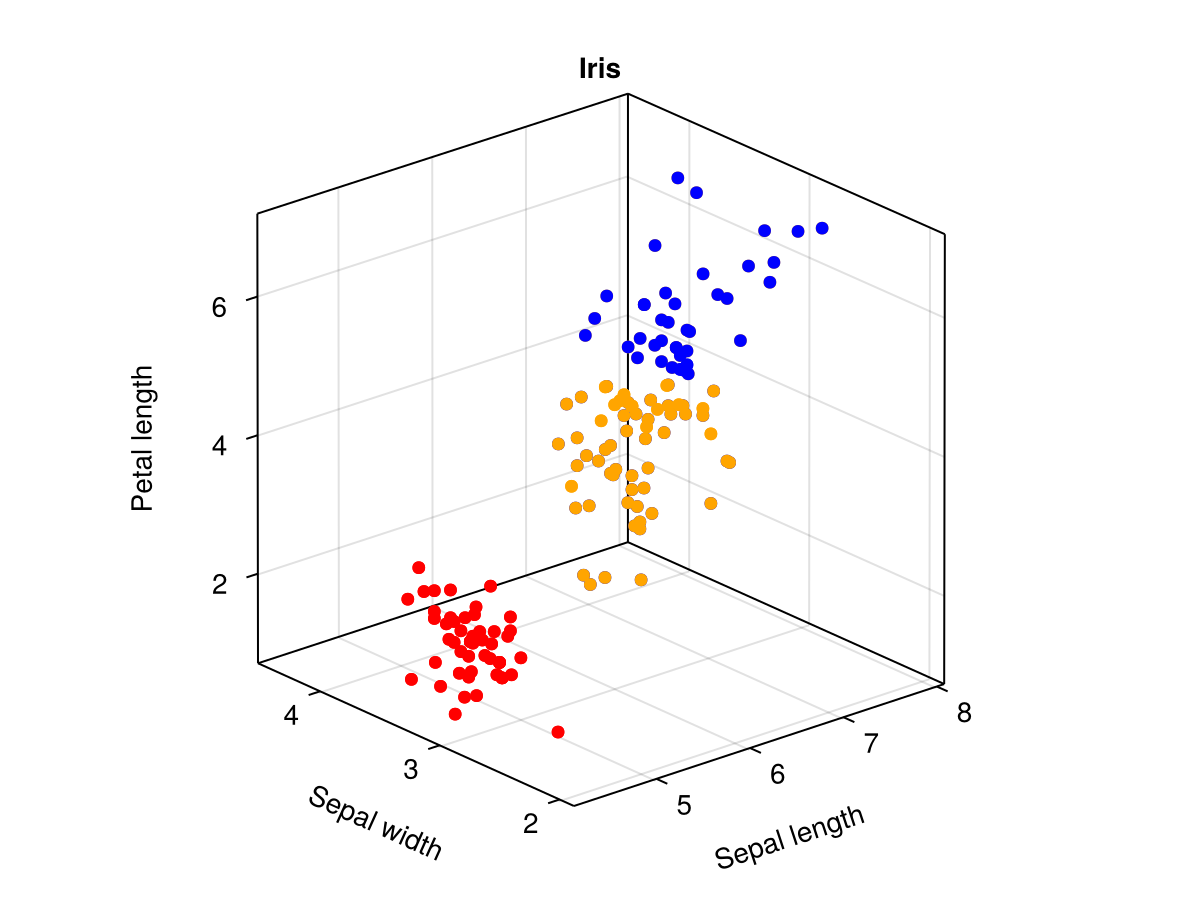

In [28]:
figk = Figure()
axk = Axis3(figk[1,1],
    aspect = (1, 1, 1),
    title = "Iris",
    xlabel = "Sepal length",
    ylabel = "Sepal width",
    zlabel = "Petal length")
scatter!(ax,xk1, color=:red)
scatter!(ax,xk2, color=:blue)
scatter!(ax,xk3, color=:orange)
fig

In [29]:
xk1

50-element Vector{Point{3, Float32}}:
 [5.1, 3.5, 1.4]
 [4.9, 3.0, 1.4]
 [4.7, 3.2, 1.3]
 [4.6, 3.1, 1.5]
 [5.0, 3.6, 1.4]
 [5.4, 3.9, 1.7]
 [4.6, 3.4, 1.4]
 [5.0, 3.4, 1.5]
 [4.4, 2.9, 1.4]
 [4.9, 3.1, 1.5]
 [5.4, 3.7, 1.5]
 [4.8, 3.4, 1.6]
 [4.8, 3.0, 1.4]
 ⋮
 [4.4, 3.0, 1.3]
 [5.1, 3.4, 1.5]
 [5.0, 3.5, 1.3]
 [4.5, 2.3, 1.3]
 [4.4, 3.2, 1.3]
 [5.0, 3.5, 1.6]
 [5.1, 3.8, 1.9]
 [4.8, 3.0, 1.4]
 [5.1, 3.8, 1.6]
 [4.6, 3.2, 1.4]
 [5.3, 3.7, 1.5]
 [5.0, 3.3, 1.4]

In [30]:
xk2

39-element Vector{Point{3, Float32}}:
 [7.0, 3.2, 4.7]
 [6.9, 3.1, 4.9]
 [6.7, 3.0, 5.0]
 [6.3, 3.3, 6.0]
 [7.1, 3.0, 5.9]
 [6.3, 2.9, 5.6]
 [6.5, 3.0, 5.8]
 [7.6, 3.0, 6.6]
 [7.3, 2.9, 6.3]
 [6.7, 2.5, 5.8]
 [7.2, 3.6, 6.1]
 [6.5, 3.2, 5.1]
 [6.4, 2.7, 5.3]
 ⋮
 [6.1, 2.6, 5.6]
 [7.7, 3.0, 6.1]
 [6.3, 3.4, 5.6]
 [6.4, 3.1, 5.5]
 [6.9, 3.1, 5.4]
 [6.7, 3.1, 5.6]
 [6.9, 3.1, 5.1]
 [6.8, 3.2, 5.9]
 [6.7, 3.3, 5.7]
 [6.7, 3.0, 5.2]
 [6.5, 3.0, 5.2]
 [6.2, 3.4, 5.4]

In [31]:
xk3

61-element Vector{Point{3, Float32}}:
 [6.4, 3.2, 4.5]
 [5.5, 2.3, 4.0]
 [6.5, 2.8, 4.6]
 [5.7, 2.8, 4.5]
 [6.3, 3.3, 4.7]
 [4.9, 2.4, 3.3]
 [6.6, 2.9, 4.6]
 [5.2, 2.7, 3.9]
 [5.0, 2.0, 3.5]
 [5.9, 3.0, 4.2]
 [6.0, 2.2, 4.0]
 [6.1, 2.9, 4.7]
 [5.6, 2.9, 3.6]
 ⋮
 [5.7, 2.5, 5.0]
 [5.8, 2.8, 5.1]
 [6.0, 2.2, 5.0]
 [5.6, 2.8, 4.9]
 [6.3, 2.7, 4.9]
 [6.2, 2.8, 4.8]
 [6.1, 3.0, 4.9]
 [6.3, 2.8, 5.1]
 [6.0, 3.0, 4.8]
 [5.8, 2.7, 5.1]
 [6.3, 2.5, 5.0]
 [5.9, 3.0, 5.1]